<a href="https://colab.research.google.com/github/aryanranderiya/MachineLearning/blob/main/MLProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Projects/Machine Learning/RainfallinIndia.csv")

In [ ]:
from sklearn.impute import SimpleImputer

missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')

for i in range(len(train.columns)):
  if(i==0):
    continue
  X=train.iloc[:,i].values
  X=X.reshape(-1,1)
  train.iloc[:,i] = missingvalueimputer.fit_transform(X)

<ipython-input-3-cec61946a939>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.iloc[:,i] = missingvalueimputer.fit_transform(X)


In [ ]:
train.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [ ]:
train.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901.0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902.0,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903.0,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904.0,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905.0,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [ ]:
train.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011.0,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012.0,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013.0,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014.0,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015.0,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


<ipython-input-15-9c005310c1a1>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


<Axes: >

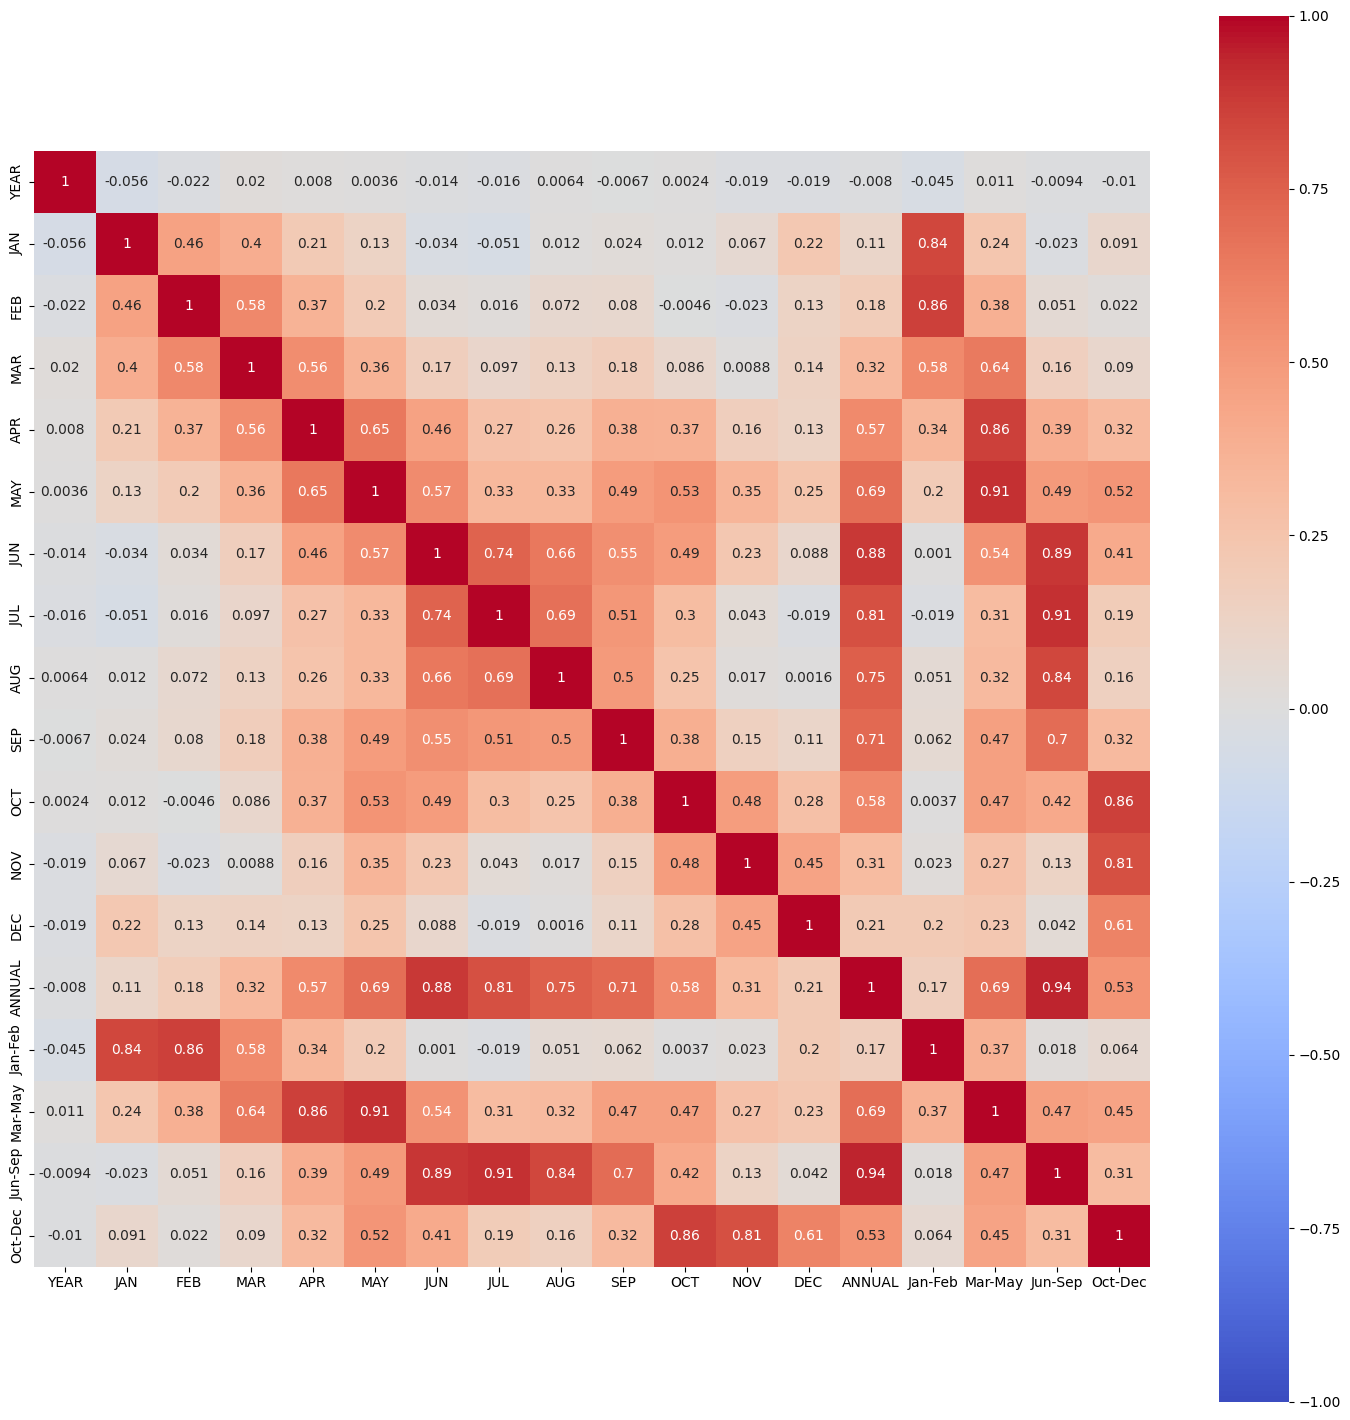

In [ ]:
# print(train['SUBDIVISION'].value_counts())

plt.figure(figsize=(18, 18))
# _ = sns.countplot(x='ANNUAL', data=train)
# sns.lineplot(data=train, y='ANNUAL', errorbar=None)
# plt.xlabel("SUBDIVISION")
# plt.ylabel("ANNUAL")
# plt.title("Rainfall Over the Years in Different States")
sns.heatmap(train.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [ ]:
#cols = train.columns
cols = ['Jan-Feb', 'Mar-May', 'Oct-Dec', 'Jun-Sep','ANNUAL']

num_cols = len(cols)
nrows = np.ceil(num_cols/2).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20,5))
axes = axes.flatten()
for i, col in enumerate(cols):
    # sns.countplot(x=col, data=df, ax=axes[i])
    sns.countplot(x='SUBDIVISION', data=train, hue=col,ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()